<a href="https://colab.research.google.com/github/Dielvic/KPMG-Analysis-Virtual-Stage/blob/main/KPMG_virtual_stage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KPMG Virtual Stage
 Sprocket Central Pty Ltd 

Import data

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
xlsx = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')
df1 = pd.read_excel(xlsx, 'Transactions', header= 1)
df2 = pd.read_excel(xlsx, 'CustomerDemographic', header= 1)
df3 = pd.read_excel(xlsx, 'CustomerAddress', header= 1)
df4 = pd.read_excel(xlsx, 'NewCustomerList', header= 1)

# I - Data Quality Assessment

In [3]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [5]:
df1.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [6]:
df1['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [7]:
df1['online_order'].value_counts()

1.0    9829
0.0    9811
Name: online_order, dtype: int64

In [8]:
# data fill with value
df1.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

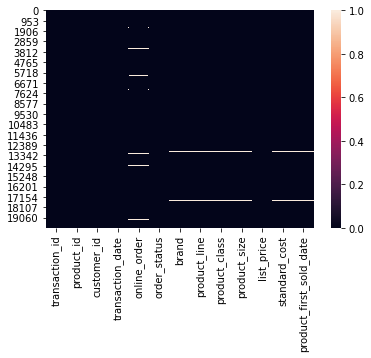

In [9]:
sns.heatmap(df1.isna())

In [10]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [11]:
df2.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [13]:
df2.sort_values('DOB', ascending=True)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,NaN,No,20.0
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


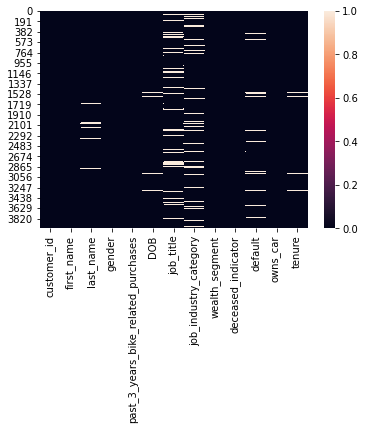

In [14]:
sns.heatmap(df2.isna())

In [15]:
df2.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [16]:
#correct value
for i in df2['DOB']:
  if i < np.datetime64('1900-01-01'):
    df2['DOB'] = df2['DOB'].replace(i , (i + np.timedelta64(100, "Y")))

In [17]:
df2['DOB'].sort_values()

719    1931-10-23 00:00:00
1091   1935-08-22 00:00:00
3409   1940-09-22 00:00:00
2412   1943-08-11 00:00:00
33     1943-12-21 06:00:00
               ...        
3778                   NaT
3882                   NaT
3930                   NaT
3934                   NaT
3997                   NaT
Name: DOB, Length: 4000, dtype: datetime64[ns]

In [18]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [19]:
df3['property_valuation'].value_counts()

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

In [20]:
df3['customer_id'].unique()

array([   1,    2,    4, ..., 4001, 4002, 4003])

In [21]:
df2['customer_id'].unique()

array([   1,    2,    3, ..., 3998, 3999, 4000])

In [22]:
set(list(df3['customer_id'].unique())).symmetric_difference(set(list(df2['customer_id'].unique())))

{3, 10, 22, 23, 4001, 4002, 4003}

In [23]:
set(list(df3['customer_id'].unique())) - (set(list(df2['customer_id'].unique())))

{4001, 4002, 4003}

In [24]:
(set(list(df2['customer_id'].unique()))) - set(list(df3['customer_id'].unique())) 

{3, 10, 22, 23}

In [25]:
len(df1['customer_id'].unique())

3494

In [26]:
(set(list(df1['customer_id'].unique()))) - set(list(df3['customer_id'].unique()))

{3, 10, 22, 23, 5034}

In [27]:
(set(list(df1['customer_id'].unique()))) - set(list(df2['customer_id'].unique()))

{5034}

#### - Incoherrent Customer_ID "5034" that we don't find in dataset 2 and 3.   Some asymetric Customer_ID in dataset 2 that we don't find in dataset 3   : {3, 10, 22, 23}. And vice versa: {4001, 4002, 4003} 

 #### - the variable product_first_sold_date seems not coherent. It's not a date as his name indicate

### - Some missing values in dataset 1 and dataset 2

# II- Data Insights

### A- Data exploration

In [28]:
df4.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [29]:
df4.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.747340,0.839005,0.942673,0.870514,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.205082,0.248858,0.294832,0.280891,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.340000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.570000,0.637500,0.712500,0.658750,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.820000,0.912500,0.842625,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.031875,1.142969,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [30]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [31]:
#Jointure des dataframes CustomerDemographic et CustomerAddress
df_inner = df2.merge(df3, how='inner')
# Suppression de la colonne default
df_inner = df_inner.drop(['default'], axis = 1)

In [32]:
df_inner.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


A- Data exploration

In [33]:
# Etude de la variable gender
df_inner['gender'].value_counts()

Female    2035
Male      1870
U           88
M            1
Femal        1
F            1
Name: gender, dtype: int64

In [34]:
# Redéfinissions des catégories
df_inner['gender'] = df_inner['gender'].map({'U':'Male',
                                       'M' :'Male',
                                       'Femal':'Female',
                                       'F':'Female',
                                       'Female': 'Female',
                                       'Male': 'Male'})

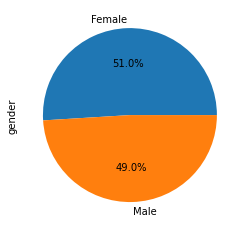

In [35]:
df_inner['gender'].value_counts().plot.pie(autopct="%.1f%%")

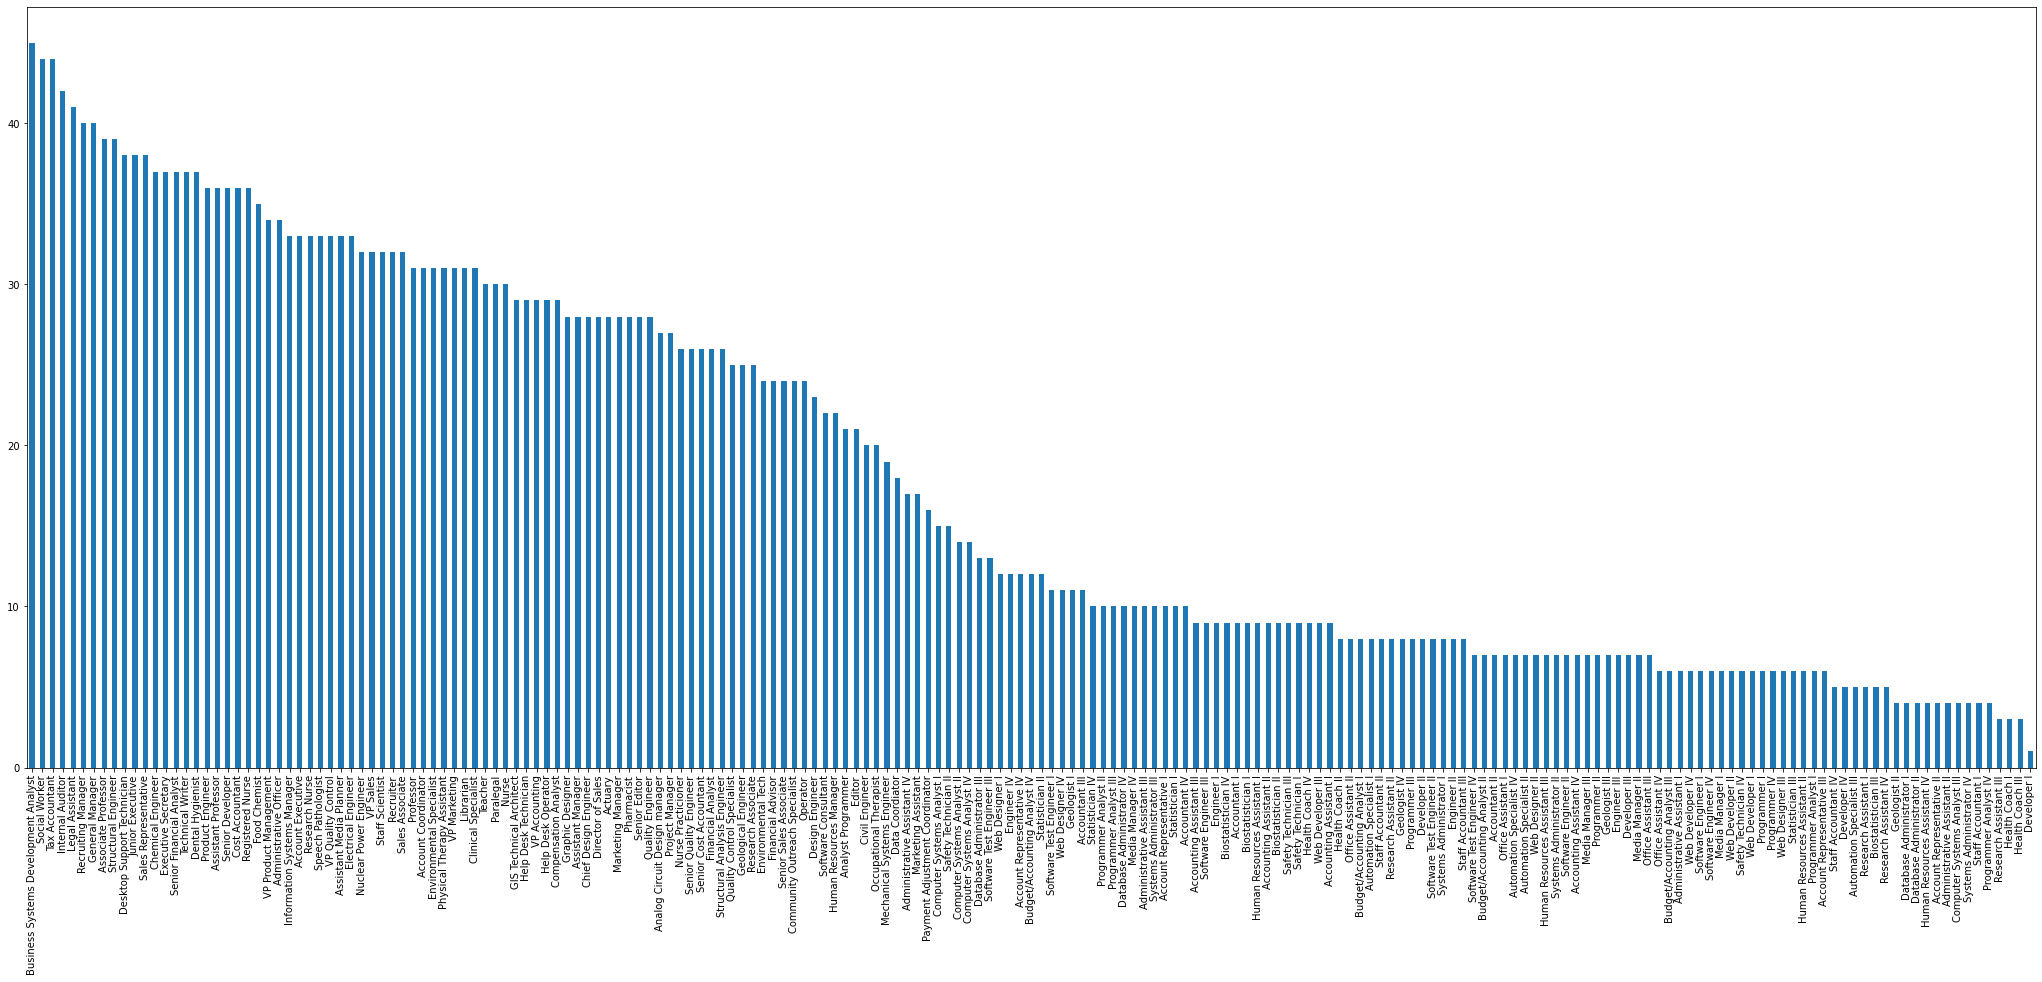

In [36]:
plt.figure(figsize=(36,14))
df_inner['job_title'].value_counts().plot.bar()

In [37]:
df_inner['job_title'].value_counts()

Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
Legal Assistant                         41
                                        ..
Programmer Analyst IV                    4
Research Assistant III                   3
Health Coach I                           3
Health Coach III                         3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [38]:
#retirons les suffixes en "I" afin de regroper les métiers
df_inner['job_title'] = df_inner['job_title'].str.rstrip('I')

In [39]:
#retirons les suffixes en "V" afin de regroper les métiers
df_inner['job_title'] = df_inner['job_title'].str.rstrip('IV')

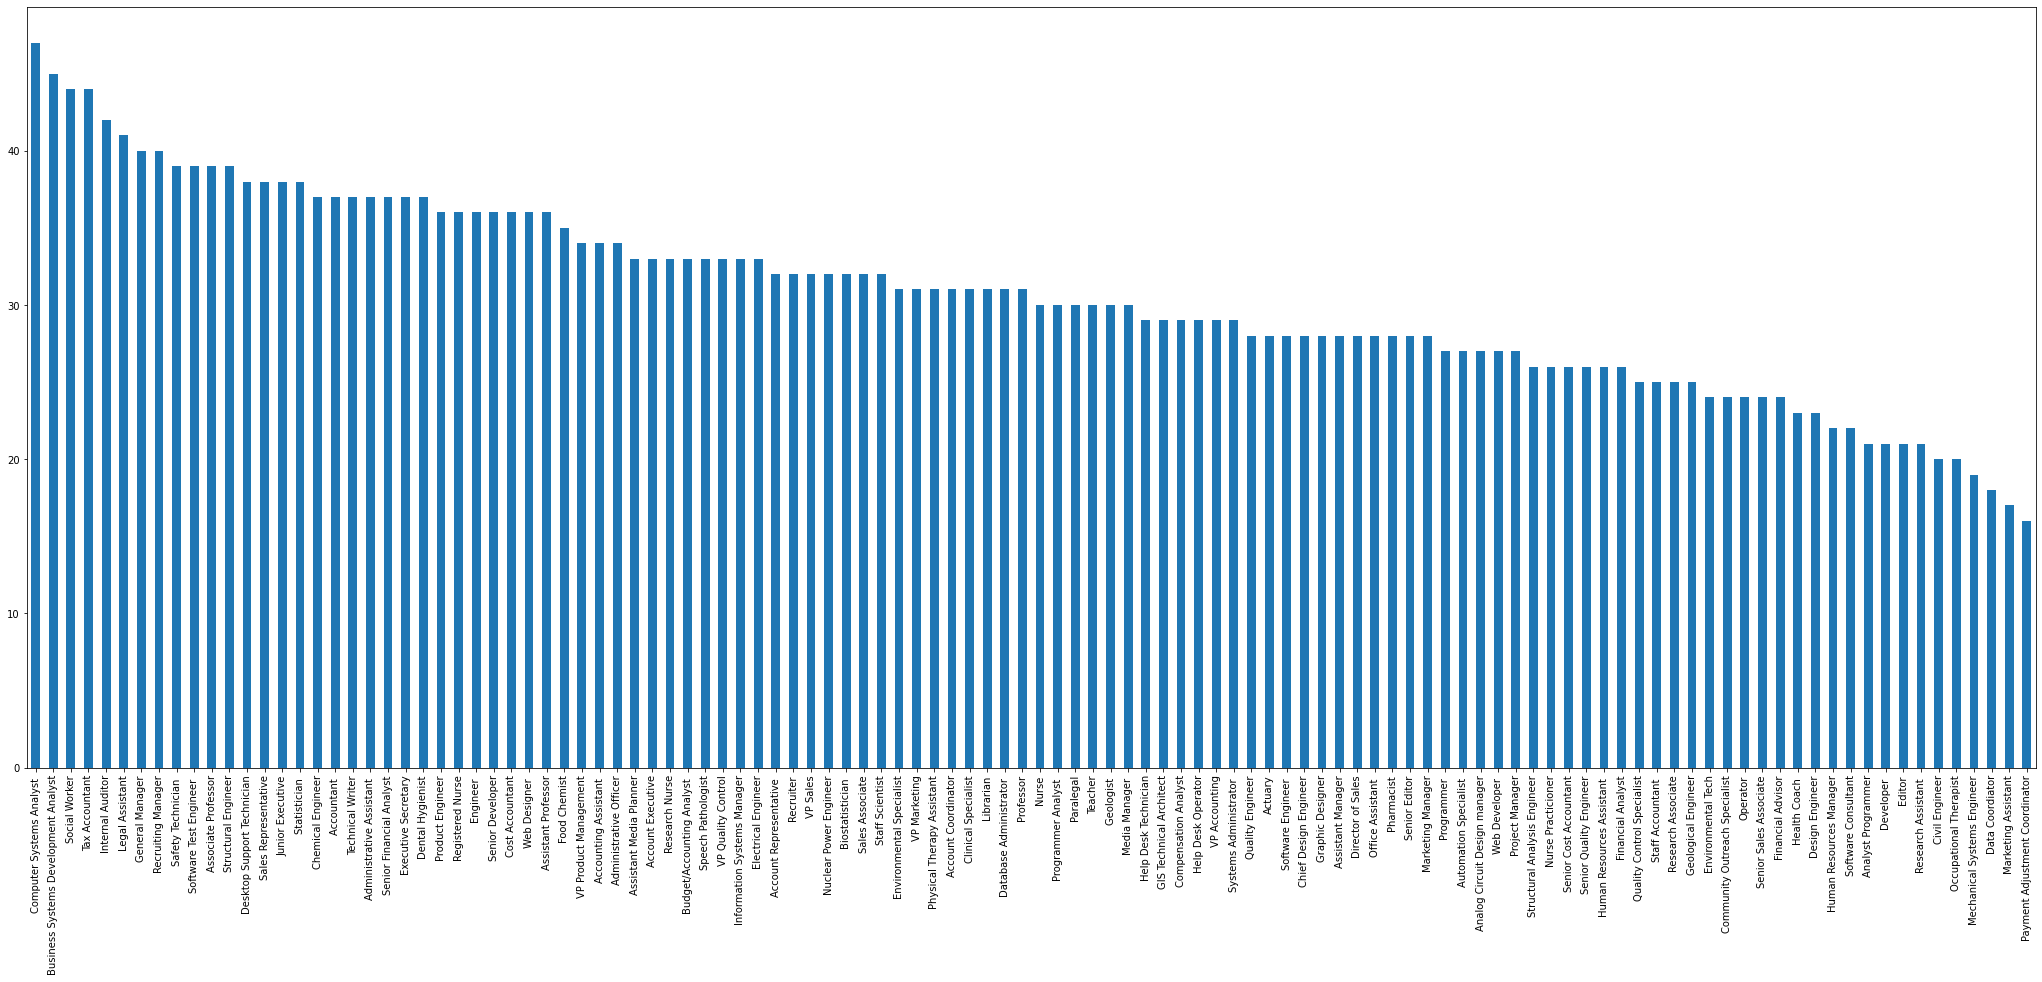

In [40]:
plt.figure(figsize=(36,14))
df_inner["job_title"].value_counts().plot.bar()

In [41]:
df_inner["job_title"].value_counts()

Computer Systems Analyst                47
Business Systems Development Analyst    45
Social Worker                           44
Tax Accountant                          44
Internal Auditor                        42
                                        ..
Occupational Therapist                  20
Mechanical Systems Engineer             19
Data Coordiator                         18
Marketing Assistant                     17
Payment Adjustment Coordinator          16
Name: job_title, Length: 114, dtype: int64

In [42]:
# Transformon DOB en Age
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [44]:
import datetime

In [47]:
df_inner['Age'] = df_inner['DOB'].apply(lambda x: from_dob_to_age(x))

In [49]:
df_inner.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10,67.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,40.0
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,59.0
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4,43.0
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,54.0


In [50]:
df_inner = df_inner.drop('DOB', axis = 1)

In [54]:
# reordonnons les colonnes
df_inner = df_inner[["customer_id", 'first_name', "last_name", "gender", "past_3_years_bike_related_purchases", "Age", "job_title", "job_industry_category", "wealth_segment", "deceased_indicator", "owns_car", "tenure", "address", "postcode", "state","country", "property_valuation" ]]

In [56]:
df_inner['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    773
Health                602
Retail                358
Property              266
IT                    222
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

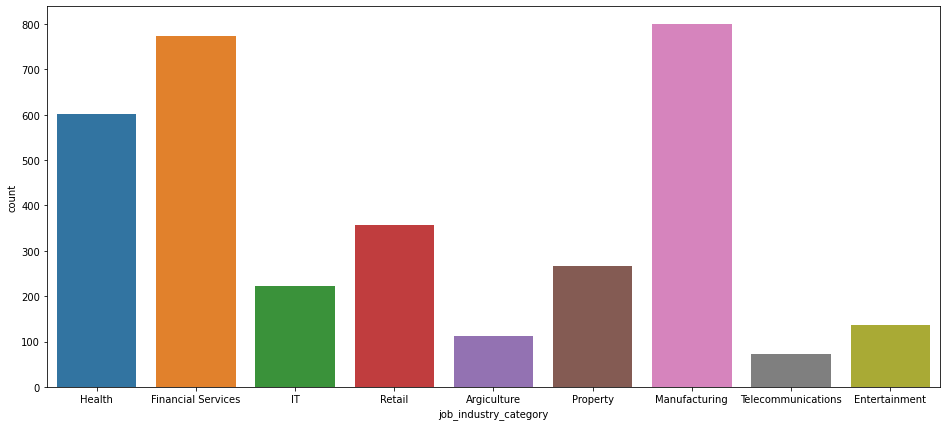

In [98]:
plt.figure(figsize=(16,7))
sns.countplot(x= 'job_industry_category', data = df_inner)

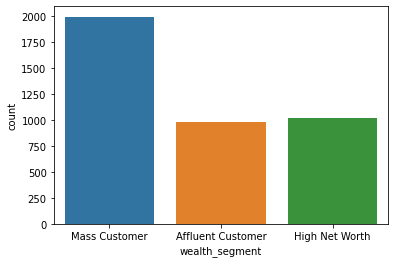

In [82]:
sns.countplot(x= 'wealth_segment', data = df_inner)

In [91]:
df_inner['deceased_indicator'].value_counts()
#Variables quasi monocmodale

N    3994
Y       2
Name: deceased_indicator, dtype: int64

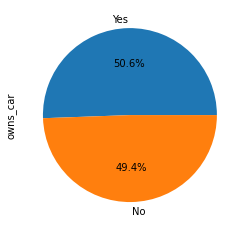

In [100]:
df_inner['owns_car'].value_counts().plot.pie(autopct="%.1f%%")

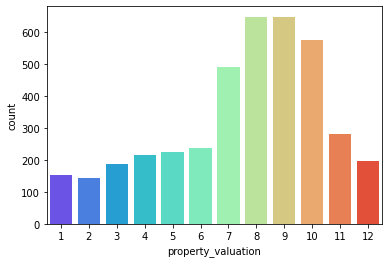

In [97]:
sns.countplot(x = 'property_valuation', data = df_inner, palette = 'rainbow' )

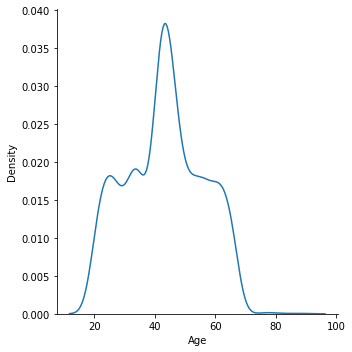

In [128]:
sns.displot(data=df_inner, x='Age', kind= "kde")

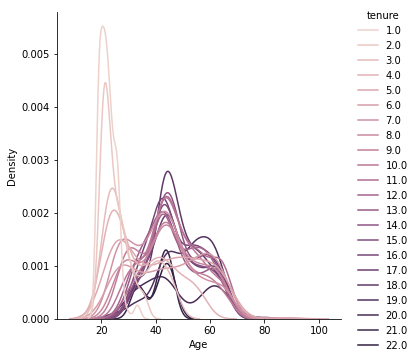

In [127]:
sns.displot(data=df_inner, x='Age', kind= "kde", hue = 'tenure')